In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error, precision_score, recall_score, roc_auc_score
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [6]:
# Load dataframes
df_recipes = pd.read_csv("../data/df_with_diets.csv")
df_reviews = pd.read_csv("../data/reviews.csv")

# EDA
## Adjust rating values

In [7]:
# Change rating in order to make initial given 0 count unlike the 0 given for mising ratings
def update_rating(value, updated):
    if updated:
        return value
    if value == 0:
        return 1, True
    elif value == 1:
        return 2, True
    elif value == 2:
        return 3, True
    elif value == 3:
        return 4, True
    elif value == 4:
        return 5, True
    elif value == 5:
        return 6, True
    else:
        return value, False

# Creates a new column to check if values are already adjusted
df_reviews['Updated'] = False

# # Apply the function to the entire column "Rating" in the DataFrame "df_reviews"
df_reviews['Rating'], df_reviews['Updated'] = zip(*df_reviews.apply(lambda row: update_rating(row['Rating'], row['Updated']), axis=1))

# Removing the auxiliary column 'Updated
del df_reviews['Updated']

### Inspect min No of reviews for user & recipes


In [ ]:
# Count relation between No recipes & No reviews

count_ratings = []
for i in range(1, 51):
    count_ratings.append(df_reviews.groupby("RecipeId").filter(lambda x: x["RecipeId"].count() > i).shape[0])

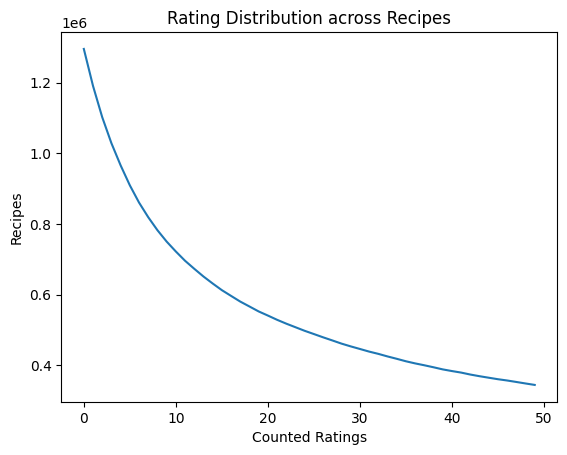

In [ ]:
# Plot calculation

plt.plot(count_ratings)
# Add title and labels
plt.title("Rating Distribution across Recipes")  # Add title
plt.xlabel("Counted Ratings")         # Add x-axis label
plt.ylabel("Recipes")         # Add y-axis label
# Display the plot
plt.show()

In [ ]:
# Count No of reviews per author

count_user_ratings = []
for i in range(1, 51):
    count_user_ratings.append(df_reviews.groupby("AuthorId").filter(lambda x: x["AuthorId"].count() > i).shape[0])

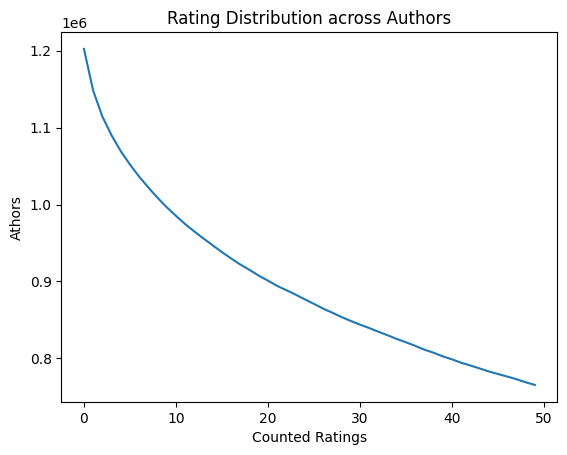

In [ ]:
# Plot relation

plt.plot(count_user_ratings)
# Add title and labels
plt.title("Rating Distribution across Authors")  # Add title
plt.xlabel("Counted Ratings")         # Add x-axis label
plt.ylabel("Athors")         # Add y-axis label
# Display the plot
plt.show()


#### Adjust dataset according to results of inspection

In [8]:
# Filter only recipes with more than 10 reviews

ratings = df_reviews.copy()
recipe_group = ratings.groupby("RecipeId").filter(lambda x: x["RecipeId"].count() > 10)

In [9]:
# Filter only authors with more than 5 reviews

user_rating_group = ratings.groupby(['AuthorId']).filter(lambda x: x["AuthorId"].count() > 5)

In [10]:
# Adjust initial dataset (ratings) according prerunned filters

ratings = ratings[ratings['AuthorId'].isin(user_rating_group['AuthorId'])]
ratings = ratings[ratings['RecipeId'].isin(recipe_group['RecipeId'])]

In [11]:
# Drop irrelevant columns

ratings.drop(['ReviewId', 'AuthorName', 'Review', 'DateSubmitted', 'DateModified'], axis=1, inplace=True)

# Add test user

## 1. Add american food lover


In [12]:
new_row = {'RecipeId': 15101, 'AuthorId': 1536, 'Rating': 6}
ratings.loc[len(ratings)] = new_row

print(ratings.tail(1))

        RecipeId  AuthorId  Rating
544469     15101      1536       6


In [13]:
new_ro = pd.DataFrame({'RecipeId': [118852], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_ro], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544466     73866    843817       6
544467     26370   2038463       1
544468    339905     35251       6
544469     15101      1536       6
544470    118852      1536       6

[544471 rows x 3 columns]


In [14]:
new_row1 = pd.DataFrame({'RecipeId': [253236], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row1], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544467     26370   2038463       1
544468    339905     35251       6
544469     15101      1536       6
544470    118852      1536       6
544471    253236      1536       6

[544472 rows x 3 columns]


In [15]:
new_row2 = pd.DataFrame({'RecipeId': [11571], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544468    339905     35251       6
544469     15101      1536       6
544470    118852      1536       6
544471    253236      1536       6
544472     11571      1536       6

[544473 rows x 3 columns]


In [16]:
new_row2 = pd.DataFrame({'RecipeId': [275854], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544469     15101      1536       6
544470    118852      1536       6
544471    253236      1536       6
544472     11571      1536       6
544473    275854      1536       6

[544474 rows x 3 columns]


In [17]:
new_row2 = pd.DataFrame({'RecipeId': [17917], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544470    118852      1536       6
544471    253236      1536       6
544472     11571      1536       6
544473    275854      1536       6
544474     17917      1536       6

[544475 rows x 3 columns]


In [18]:
new_row2 = pd.DataFrame({'RecipeId': [47606], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544471    253236      1536       6
544472     11571      1536       6
544473    275854      1536       6
544474     17917      1536       6
544475     47606      1536       6

[544476 rows x 3 columns]


In [19]:
new_row2 = pd.DataFrame({'RecipeId': [345232], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544472     11571      1536       6
544473    275854      1536       6
544474     17917      1536       6
544475     47606      1536       6
544476    345232      1536       6

[544477 rows x 3 columns]


In [20]:
new_row2 = pd.DataFrame({'RecipeId': [173585], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544473    275854      1536       6
544474     17917      1536       6
544475     47606      1536       6
544476    345232      1536       6
544477    173585      1536       6

[544478 rows x 3 columns]


In [21]:
new_row2 = pd.DataFrame({'RecipeId': [39087], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544474     17917      1536       6
544475     47606      1536       6
544476    345232      1536       6
544477    173585      1536       6
544478     39087      1536       6

[544479 rows x 3 columns]


In [22]:
new_row2 = pd.DataFrame({'RecipeId': [317152], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544475     47606      1536       6
544476    345232      1536       6
544477    173585      1536       6
544478     39087      1536       6
544479    317152      1536       6

[544480 rows x 3 columns]


In [23]:
new_row2 = pd.DataFrame({'RecipeId': [245576], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544476    345232      1536       6
544477    173585      1536       6
544478     39087      1536       6
544479    317152      1536       6
544480    245576      1536       6

[544481 rows x 3 columns]


In [24]:
new_row2 = pd.DataFrame({'RecipeId': [10428], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544477    173585      1536       6
544478     39087      1536       6
544479    317152      1536       6
544480    245576      1536       6
544481     10428      1536       6

[544482 rows x 3 columns]


In [25]:
new_row2 = pd.DataFrame({'RecipeId': [219572], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544478     39087      1536       6
544479    317152      1536       6
544480    245576      1536       6
544481     10428      1536       6
544482    219572      1536       6

[544483 rows x 3 columns]


In [26]:
new_row2 = pd.DataFrame({'RecipeId': [97098], 'AuthorId': [1536], 'Rating': [6]})
ratings = pd.concat([ratings, new_row2], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544479    317152      1536       6
544480    245576      1536       6
544481     10428      1536       6
544482    219572      1536       6
544483     97098      1536       6

[544484 rows x 3 columns]


In [27]:
ratings.tail()

,RecipeId,AuthorId,Rating
544479,317152,1536,6
544480,245576,1536,6
544481,10428,1536,6
544482,219572,1536,6
544483,97098,1536,6


---

## 2. Add vegan & Italian food lover


In [28]:
new_row3 = pd.DataFrame({'RecipeId': [29253], 'AuthorId': [10700], 'Rating': [6]})
ratings = pd.concat([ratings, new_row3], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544480    245576      1536       6
544481     10428      1536       6
544482    219572      1536       6
544483     97098      1536       6
544484     29253     10700       6

[544485 rows x 3 columns]


In [29]:
new_row3 = pd.DataFrame({'RecipeId': [82037], 'AuthorId': [10700], 'Rating': [6]})
ratings = pd.concat([ratings, new_row3], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544481     10428      1536       6
544482    219572      1536       6
544483     97098      1536       6
544484     29253     10700       6
544485     82037     10700       6

[544486 rows x 3 columns]


In [30]:
new_row3 = pd.DataFrame({'RecipeId': [35805], 'AuthorId': [10700], 'Rating': [6]})
ratings = pd.concat([ratings, new_row3], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544482    219572      1536       6
544483     97098      1536       6
544484     29253     10700       6
544485     82037     10700       6
544486     35805     10700       6

[544487 rows x 3 columns]


In [31]:
new_row3 = pd.DataFrame({'RecipeId': [61816], 'AuthorId': [10700], 'Rating': [6]})
ratings = pd.concat([ratings, new_row3], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544483     97098      1536       6
544484     29253     10700       6
544485     82037     10700       6
544486     35805     10700       6
544487     61816     10700       6

[544488 rows x 3 columns]


In [32]:
new_row3 = pd.DataFrame({'RecipeId': [217734], 'AuthorId': [10700], 'Rating': [6]})
ratings = pd.concat([ratings, new_row3], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544484     29253     10700       6
544485     82037     10700       6
544486     35805     10700       6
544487     61816     10700       6
544488    217734     10700       6

[544489 rows x 3 columns]


In [33]:
new_row3 = pd.DataFrame({'RecipeId': [5413], 'AuthorId': [10700], 'Rating': [6]})
ratings = pd.concat([ratings, new_row3], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544485     82037     10700       6
544486     35805     10700       6
544487     61816     10700       6
544488    217734     10700       6
544489      5413     10700       6

[544490 rows x 3 columns]


In [34]:
new_row3 = pd.DataFrame({'RecipeId': [403282], 'AuthorId': [10700], 'Rating': [6]})
ratings = pd.concat([ratings, new_row3], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544486     35805     10700       6
544487     61816     10700       6
544488    217734     10700       6
544489      5413     10700       6
544490    403282     10700       6

[544491 rows x 3 columns]


In [35]:
new_row3 = pd.DataFrame({'RecipeId': [115553], 'AuthorId': [10700], 'Rating': [6]})
ratings = pd.concat([ratings, new_row3], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544487     61816     10700       6
544488    217734     10700       6
544489      5413     10700       6
544490    403282     10700       6
544491    115553     10700       6

[544492 rows x 3 columns]


In [36]:
new_row3 = pd.DataFrame({'RecipeId': [81419], 'AuthorId': [10700], 'Rating': [6]})
ratings = pd.concat([ratings, new_row3], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544488    217734     10700       6
544489      5413     10700       6
544490    403282     10700       6
544491    115553     10700       6
544492     81419     10700       6

[544493 rows x 3 columns]


In [37]:
new_row3 = pd.DataFrame({'RecipeId': [175799], 'AuthorId': [10700], 'Rating': [6]})
ratings = pd.concat([ratings, new_row3], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544489      5413     10700       6
544490    403282     10700       6
544491    115553     10700       6
544492     81419     10700       6
544493    175799     10700       6

[544494 rows x 3 columns]


---

## 3. Add glutenfree fish fan


In [38]:
new_row4 = pd.DataFrame({'RecipeId': [41992], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544490    403282     10700       6
544491    115553     10700       6
544492     81419     10700       6
544493    175799     10700       6
544494     41992     29600       6

[544495 rows x 3 columns]


In [39]:
new_row4 = pd.DataFrame({'RecipeId': [44487], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544491    115553     10700       6
544492     81419     10700       6
544493    175799     10700       6
544494     41992     29600       6
544495     44487     29600       6

[544496 rows x 3 columns]


In [40]:
new_row4 = pd.DataFrame({'RecipeId': [339474], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544492     81419     10700       6
544493    175799     10700       6
544494     41992     29600       6
544495     44487     29600       6
544496    339474     29600       6

[544497 rows x 3 columns]


In [41]:
new_row4 = pd.DataFrame({'RecipeId': [255600], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544493    175799     10700       6
544494     41992     29600       6
544495     44487     29600       6
544496    339474     29600       6
544497    255600     29600       6

[544498 rows x 3 columns]


In [42]:
new_row4 = pd.DataFrame({'RecipeId': [37457], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544494     41992     29600       6
544495     44487     29600       6
544496    339474     29600       6
544497    255600     29600       6
544498     37457     29600       6

[544499 rows x 3 columns]


In [43]:
new_row4 = pd.DataFrame({'RecipeId': [41992], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544495     44487     29600       6
544496    339474     29600       6
544497    255600     29600       6
544498     37457     29600       6
544499     41992     29600       6

[544500 rows x 3 columns]


In [44]:
new_row4 = pd.DataFrame({'RecipeId': [57170], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544496    339474     29600       6
544497    255600     29600       6
544498     37457     29600       6
544499     41992     29600       6
544500     57170     29600       6

[544501 rows x 3 columns]


In [45]:
new_row4 = pd.DataFrame({'RecipeId': [48824], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544497    255600     29600       6
544498     37457     29600       6
544499     41992     29600       6
544500     57170     29600       6
544501     48824     29600       6

[544502 rows x 3 columns]


In [46]:
new_row4 = pd.DataFrame({'RecipeId': [88346], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544498     37457     29600       6
544499     41992     29600       6
544500     57170     29600       6
544501     48824     29600       6
544502     88346     29600       6

[544503 rows x 3 columns]


In [47]:
new_row4 = pd.DataFrame({'RecipeId': [138183], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544499     41992     29600       6
544500     57170     29600       6
544501     48824     29600       6
544502     88346     29600       6
544503    138183     29600       6

[544504 rows x 3 columns]


In [48]:
new_row4 = pd.DataFrame({'RecipeId': [109163], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544500     57170     29600       6
544501     48824     29600       6
544502     88346     29600       6
544503    138183     29600       6
544504    109163     29600       6

[544505 rows x 3 columns]


In [49]:
new_row4 = pd.DataFrame({'RecipeId': [305221], 'AuthorId': [29600], 'Rating': [6]})
ratings = pd.concat([ratings, new_row4], ignore_index=True)

print(ratings)

        RecipeId  AuthorId  Rating
0           5221      2046       5
1          13307      2046       6
2           4684      2046       6
3           5221      2369       6
4           5466      2059       2
...          ...       ...     ...
544501     48824     29600       6
544502     88346     29600       6
544503    138183     29600       6
544504    109163     29600       6
544505    305221     29600       6

[544506 rows x 3 columns]


In [50]:
ratings.tail()

,RecipeId,AuthorId,Rating
544501,48824,29600,6
544502,88346,29600,6
544503,138183,29600,6
544504,109163,29600,6
544505,305221,29600,6


# Modeling

## Create matrix for models


In [51]:
# Create table with AuthorId as columns, RecipeId as index & ratings as value
ratings = ratings.pivot_table(index='RecipeId', columns='AuthorId', values='Rating')

# Replace NaN with 0
ratings.fillna(0, inplace=True)

In [52]:
# Make copy for NMF model
ratings_2 = ratings.copy()

## KNN


Pick one of the following users:
- American: 1536
- VegItalian: 10700
- GlutenfreeFish: 29600

In [73]:
# Define AuthorId for which model should calculate recommendations
specific_author_id = 29600 # HERE THE AUTHORID NEEDS TO BE ADJUSTED!

# Extract Ratings for specific AuthorId
query_data = ratings.loc[:, specific_author_id].values.reshape(1, -1)

# Initialize and fit the Nearest Neighbors model
n_neighbors = min(300, ratings.shape[0]) # HERE NO OF RECOMMENDATIONS NEEDS TO BE ADJUSTED ACCORDING TO NEED (higher no needed for filtering purposes)
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=n_neighbors)
knn_model.fit(ratings.T)  # Transpose the DataFrame to obtain the correct shape

# Find the indices of the nearest neighbors for the specific AuthorId
distances, neighbor_indices = knn_model.kneighbors(query_data)

# Make sure that index corresponds with expected value
valid_indices = [idx for idx in neighbor_indices.flatten() if idx < ratings.shape[0]]

# Output the RecipeIds of the nearest neighbors
nearest_recipe_ids = ratings.index[valid_indices]

# Retrieve the corresponding names for the RecipeIds
nearest_recipe_names = df_recipes[df_recipes['RecipeId'].isin(nearest_recipe_ids)]['Name'].values

# Create a DataFrame with the RecipeIds
nearest_recipe_ids_df = pd.DataFrame({'RecipeId': nearest_recipe_ids})

# Create a DataFrame with the RecipeIds and their names
nearest_recipes_df = pd.DataFrame({'RecipeId': nearest_recipe_ids, 'Name': nearest_recipe_names})

# Sort the DataFrame by the smallest distance
# nearest_recipes_df_sorted = nearest_recipes_df.sort_values(by='RecipeId')

# Give RecipeIds & Names
print("Recommendations for AuthorId:", specific_author_id)
print(nearest_recipes_df)

Recommendations for AuthorId: 29600
     RecipeId                                               Name
0        8730                              Delicious Pizza Sauce
1      306882                            Raspberry Sherbet Punch
2      135453                                Blueberry Dump Cake
3       52095                      Buttermilk Jalapeno Cornbread
4      178700                        Escargot a La Bourguignonne
..        ...                                                ...
295    154225                 Buttermilk Substitution for Baking
296    151328  Just Add Water Chocolate Cake in a Mug Mix fro...
297    154242                        Best Ever Italian Meatballs
298    154267                    Bacon-Wrapped Cheddar Egg Bites
299    151322                   Chinese Take-Out: Orange Chicken

[300 rows x 2 columns]


---
Depending on what you want to download for streamlit uncomment the following cells:

In [70]:
# CSV of recommendations for streamlit
# nearest_recipe_ids_df.to_csv("../data/knn_general_american.csv")

In [72]:
# CSV of recommendations for streamlit
# nearest_recipe_ids_df.to_csv("../data/knn_general_veganitalian.csv")

In [74]:
# CSV of recommendations for streamlit
# nearest_recipe_ids_df.to_csv("../data/knn_general_glutenfreefish.csv")

---

### NMF


In [55]:
# Initalization of model (this part takes some time)

model = NMF(n_components=6)
model.fit(ratings_2)

MemoryError: Unable to allocate 4.08 GiB for an array with shape (23378, 23404) and data type float64

In [ ]:
# Calculation of 2 lower dimensional matrices
H = pd.DataFrame(model.components_)
W = pd.DataFrame(model.transform(ratings_2))

# Create new df "V" with dot product of W & H
V = pd.DataFrame(np.dot(W, H), columns=ratings_2.columns)
V.index = ratings_2.index

V.tail()

AuthorId,1533,1535,1536,1634,1676,1792,1891,1962,2046,2059,...,2002502713,2002515333,2002527289,2002617723,2002646975,2002673277,2002746456,2002754832,2002872363,2002873081
RecipeId,,,,,,,,,,,,,,,,,,,,,
532078,0.000009,0.000145,0.000015,0.000004,0.000003,0.000015,0.000025,0.000012,1.730677e-07,7.379210e-08,...,0.000006,5.628794e-07,8.782598e-07,0.000016,0.000003,3.801806e-07,1.787996e-05,0.000026,8.012539e-07,9.686520e-07
533699,0.000060,0.000703,0.000010,0.000019,0.000178,0.000029,0.000137,0.000000,3.702790e-05,3.179929e-07,...,0.000002,4.406062e-05,4.815532e-06,0.000005,0.000020,7.080324e-05,6.754891e-07,0.000046,2.571272e-06,5.415129e-06
533997,0.000478,0.006104,0.000042,0.000010,0.000113,0.000004,0.000314,0.000011,5.336438e-05,5.693596e-06,...,0.000040,1.489844e-04,9.433639e-05,0.000056,0.000170,9.171498e-05,2.979163e-05,0.000108,6.062625e-05,2.451628e-05
534900,0.000101,0.001070,0.000038,0.000047,0.000143,0.000069,0.000183,0.000016,2.644065e-05,1.368059e-06,...,0.000012,3.645341e-05,4.900075e-06,0.000023,0.000028,4.772039e-05,2.139706e-05,0.000060,7.256643e-06,9.923918e-06
535779,0.000035,0.000835,0.000021,0.000000,0.000045,0.000018,0.000086,0.000021,1.417631e-05,0.000000e+00,...,0.000010,2.667784e-05,8.587222e-06,0.000035,0.000025,2.081810e-05,3.050231e-05,0.000054,0.000000e+00,3.768820e-06


In [ ]:
# Output of some AuthorIds soley testing purposes
V.columns.unique()

Index([      1533,       1535,       1536,       1634,       1676,       1792,
             1891,       1962,       2046,       2059,
       ...
       2002502713, 2002515333, 2002527289, 2002617723, 2002646975, 2002673277,
       2002746456, 2002754832, 2002872363, 2002873081],
      dtype='int64', name='AuthorId', length=23404)

Pick one of the following users:
- American: 1536
- VegItalian: 10700
- GlutenfreeFish: 29600

In [ ]:
# Create list with top 10 recommendations according to values of dot product
top_indices = V[29600].nlargest(100000000).index.tolist() # HERE THE AUTHORID NEEDS TO BE ADJUSTED!

print(top_indices)

[117892, 69173, 66596, 106251, 87782, 8739, 35813, 70165, 40339, 216350]


In [ ]:
# Create dataframe "df_recomm" for recommendation & fill with RecipeIds
df_recomm = pd.DataFrame({'RecipeId': top_indices})

print(df_recomm)

   RecipeId
0    117892
1     69173
2     66596
3    106251
4     87782
5      8739
6     35813
7     70165
8     40339
9    216350


---
Depending on what you want to download for streamlit uncomment the following cells:

In [ ]:
# CSV of recommendations for streamlit
# df_recomm.to_csv("../data/nmf_general_american.csv")

In [ ]:
# CSV of recommendations for streamlit
# df_recomm.to_csv("../data/nmf_general_american.csv")

In [75]:
# CSV of recommendations for streamlit
# df_recomm.to_csv("../data/nmf_general_american.csv")

---

In [ ]:
# Merge information about recipe names with RecipeIds
df_recomm = df_recomm.merge(df_recipes[['RecipeId', 'Name']], on='RecipeId', how='left')
# Rename new column
df_recomm = df_recomm.rename(columns={'Name': 'RecipeName'})

print(df_recomm)

   RecipeId                                         RecipeName
0    117892                                       Mexican Rice
1     69173   Kittencal's Italian Melt-In-Your-Mouth Meatballs
2     66596                     Kittencal's Famous Greek Salad
3    106251  Roasted Cauliflower &amp; 16 Roasted Cloves of...
4     87782       Greek Potatoes (Oven-Roasted and Delicious!)
5      8739                                   Wholly Guacamole
6     35813                             Oatmeal Raisin Cookies
7     70165                   Pizza Dough for Thin Crust Pizza
8     40339                                   Kung Pao Chicken
9    216350            Linda's Cheesecake-Stuffed Strawberries
